- 데이ㅏ콘 집값 경진 대회 데이터

id : 데이터 고유 id

OverallQual : 전반적 재료와 마감 품질

YearBuilt : 완공 연도

YearRemodAdd : 리모델링 연도

ExterQual : 외관 재료 품질

BsmtQual : 지하실 높이

TotalBsmtSF : 지하실 면적 

1stFlrSF : 1층 면적 

GrLivArea : 지상층 생활 면적

FullBath : 지상층 화장실 개수 

KitchenQual : 부억 품질 

GarageYrBlt : 차고 완공 연도

GarageCars: 차고 자리 개수

GarageArea: 차고 면적 

target : 집값(달러 단위)


In [116]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이콘 집값 예측 경진대회 데이터
df = pd.read_csv('/Users/geumjong-yeon/projects/ybiggit/4.FE/train.csv')
df = df.set_index('id')
df.head()

,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
id,,,,,,,,,,,,,,
1,10,2392,Ex,3,968,Ex,2392,2392,Ex,2,2003,2003,2003,386250
2,7,1352,Gd,2,466,Gd,1352,1352,Ex,2,2006,2007,2006,194000
3,5,900,TA,1,288,TA,864,900,TA,1,1967,1967,1967,123000
4,5,1174,TA,2,576,Gd,680,680,TA,1,1900,2006,2000,135000
5,7,1958,Gd,3,936,Gd,1026,1026,Gd,2,2005,2005,2005,250000


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1350 entries, 1 to 1350
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Overall Qual    1350 non-null   int64 
 1   Gr Liv Area     1350 non-null   int64 
 2   Exter Qual      1350 non-null   object
 3   Garage Cars     1350 non-null   int64 
 4   Garage Area     1350 non-null   int64 
 5   Kitchen Qual    1350 non-null   object
 6   Total Bsmt SF   1350 non-null   int64 
 7   1st Flr SF      1350 non-null   int64 
 8   Bsmt Qual       1350 non-null   object
 9   Full Bath       1350 non-null   int64 
 10  Year Built      1350 non-null   int64 
 11  Year Remod/Add  1350 non-null   int64 
 12  Garage Yr Blt   1350 non-null   int64 
 13  target          1350 non-null   int64 
dtypes: int64(11), object(3)
memory usage: 158.2+ KB


In [118]:
df.describe()

,Overall Qual,Gr Liv Area,Garage Cars,Garage Area,Total Bsmt SF,1st Flr SF,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
count,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000
mean,6.208889,1513.542222,1.870370,502.014815,1082.644444,1167.474074,1.560741,1972.987407,1985.099259,1978.471852,186406.312593
std,1.338015,487.523239,0.652483,191.389956,384.067713,375.061407,0.551646,29.307257,20.153244,25.377278,78435.424758
min,2.000000,480.000000,1.000000,100.000000,105.000000,480.000000,0.000000,1880.000000,1950.000000,1900.000000,12789.000000
25%,5.000000,1144.000000,1.000000,368.000000,816.000000,886.250000,1.000000,1955.000000,1968.000000,1961.000000,135000.000000
50%,6.000000,1445.500000,2.000000,484.000000,1009.000000,1092.500000,2.000000,1976.000000,1993.000000,1978.500000,165375.000000
75%,7.000000,1774.500000,2.000000,588.000000,1309.500000,1396.500000,2.000000,2002.000000,2004.000000,2002.000000,217875.000000
max,10.000000,4476.000000,5.000000,1488.000000,2660.000000,2898.000000,4.000000,2010.000000,2010.000000,2207.000000,745000.000000


In [119]:
print(df['Garage Yr Blt'].sort_values())
# 음수가 말도 안되기 때문에 해당 행은 삭제
df = df.drop(255)
df.reset_index
print(df['Garage Yr Blt'].sort_values())

id
247     1900
897     1900
874     1910
66      1910
405     1910
        ... 
898     2009
1231    2009
342     2009
688     2010
255     2207
Name: Garage Yr Blt, Length: 1350, dtype: int64
id
247    1900
897    1900
66     1910
874    1910
405    1910
       ... 
898    2009
721    2009
451    2009
676    2009
688    2010
Name: Garage Yr Blt, Length: 1349, dtype: int64


In [120]:
print(df.dtypes)
objects_col = ['Exter Qual', 'Kitchen Qual', 'Bsmt Qual']
not_objects_col = ['Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Garage Area', 
                   'Total Bsmt SF', '1st Flr SF', 'Full Bath', 'Year Built', 
                   'Year Remod/Add','Garage Yr Blt']
print(len(not_objects_col))

Overall Qual       int64
Gr Liv Area        int64
Exter Qual        object
Garage Cars        int64
Garage Area        int64
Kitchen Qual      object
Total Bsmt SF      int64
1st Flr SF         int64
Bsmt Qual         object
Full Bath          int64
Year Built         int64
Year Remod/Add     int64
Garage Yr Blt      int64
target             int64
dtype: object
10


In [121]:
# Year과 관련된 col들을 현재 년도에서 뺌. 얼마나 오래됐는지가 중요한 데이터이기 때문
df[['Year Built', 'Year Remod/Add', 'Garage Yr Blt']] = df[['Year Built', 'Year Remod/Add', 'Garage Yr Blt']].apply(lambda x : 2022 - x)

In [122]:
df.head()

,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
id,,,,,,,,,,,,,,
1,10,2392,Ex,3,968,Ex,2392,2392,Ex,2,19,19,19,386250
2,7,1352,Gd,2,466,Gd,1352,1352,Ex,2,16,15,16,194000
3,5,900,TA,1,288,TA,864,900,TA,1,55,55,55,123000
4,5,1174,TA,2,576,Gd,680,680,TA,1,122,16,22,135000
5,7,1958,Gd,3,936,Gd,1026,1026,Gd,2,17,17,17,250000


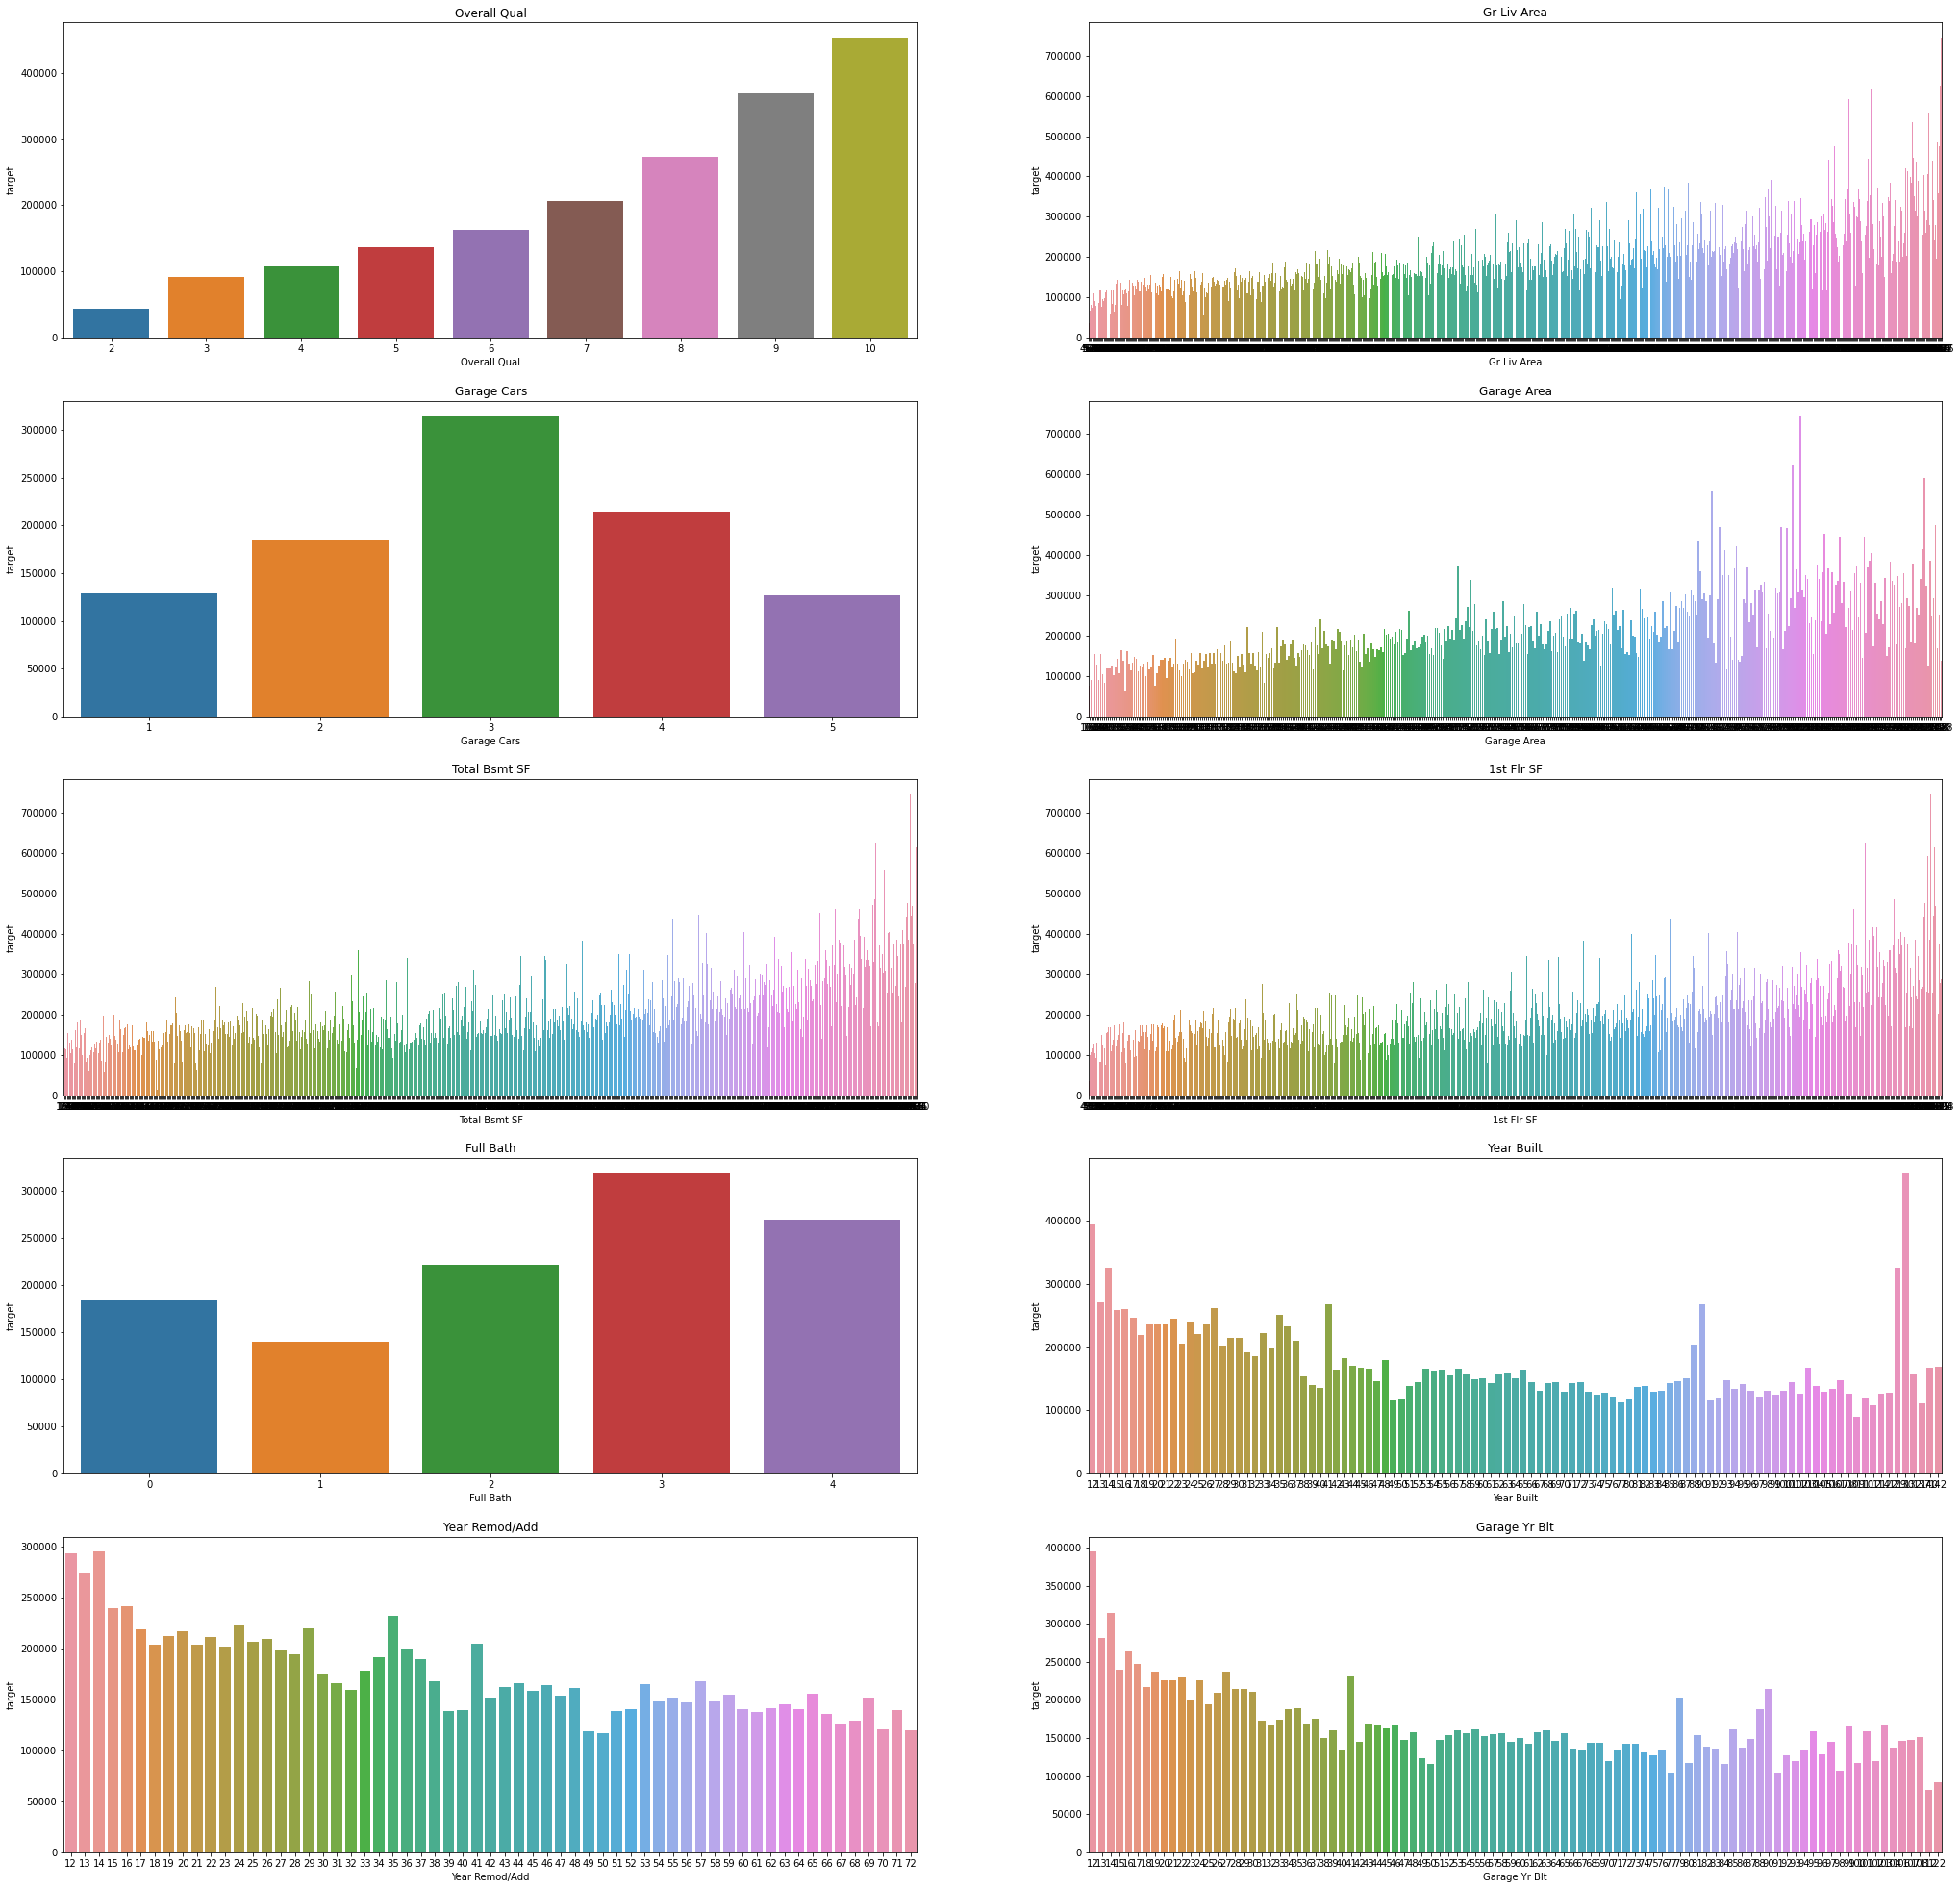

In [123]:
plt.figure(figsize = (35, 35))
for i, col in enumerate(not_objects_col):
    plt.subplot(5,2,i+1)
    sns.barplot(data = df, x = col, y='target', ci = None)
    plt.title(col)

이상치를 걱정할 필요는 없어 보임

<AxesSubplot:>

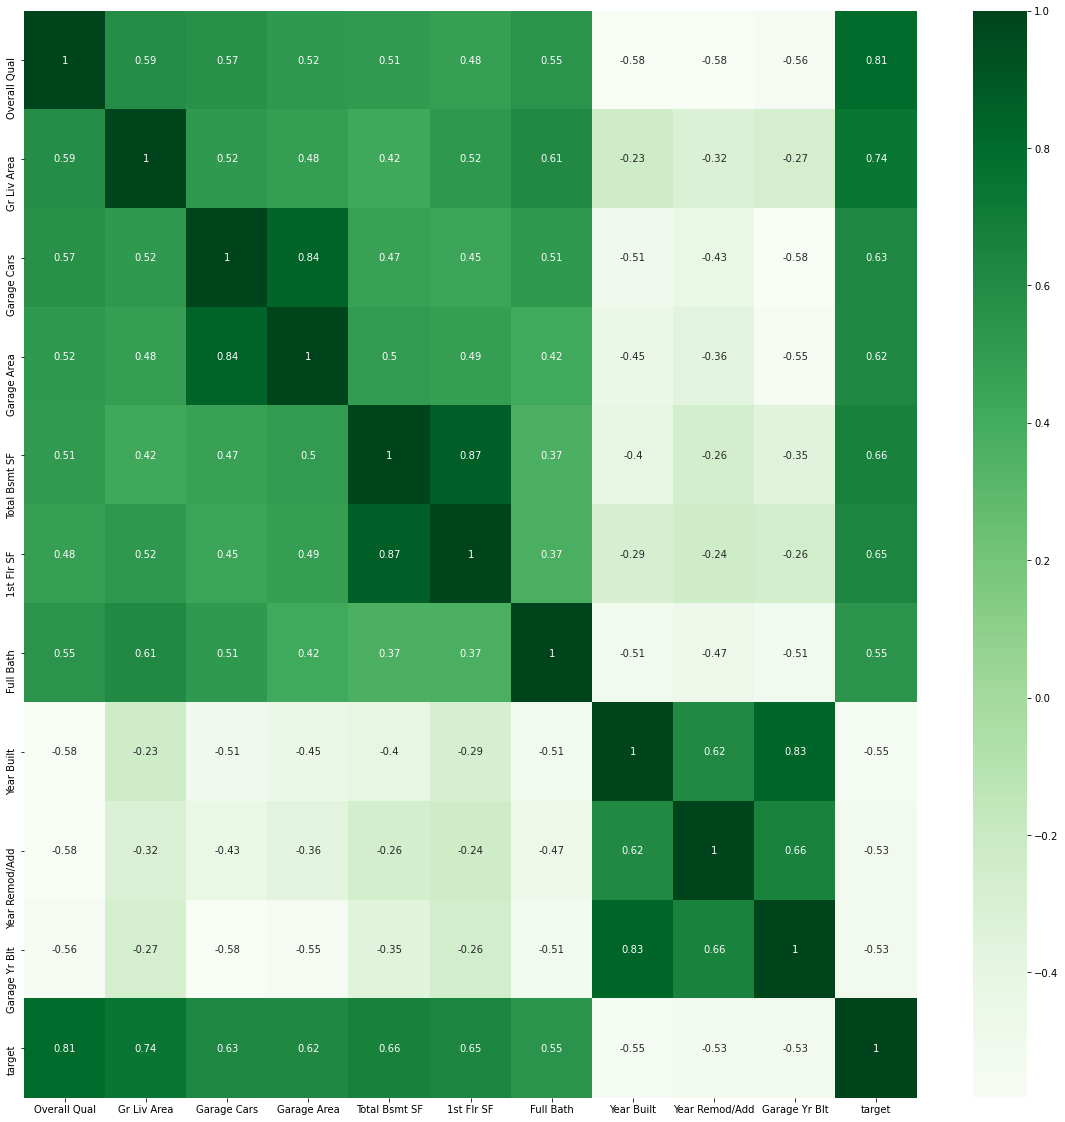

In [126]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(), annot = True ,cmap='Greens')

차고랑 관련된 데이터들은 corr 값이 다른 차고 관련 데이터 들과 비교해서 높게 나오기 때문에 차고 Garage_Cars를 제외하고 모두 삭제하고 , 1st Ftr SF도 corr이 너무 높게 나오는 열이 있기 때문에 삭제 한다

In [130]:
df = df.drop(['Garage Yr Blt', 'Gr Liv Area', '1st Flr SF'], axis = 1)
# 이미 실행 했던 것을 한번 더 실행에서 오류가 나왔는데 아래 shell을 보면 정상적으로 삭제 되었습니다.

KeyError: "['Garage Yr Blt' 'Gr Liv Area' '1st Flr SF'] not found in axis"

In [129]:
df.head()

,Overall Qual,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,target
id,,,,,,,,,,,
1,10,Ex,3,968,Ex,2392,Ex,2,19,19,386250
2,7,Gd,2,466,Gd,1352,Ex,2,16,15,194000
3,5,TA,1,288,TA,864,TA,1,55,55,123000
4,5,TA,2,576,Gd,680,TA,1,122,16,135000
5,7,Gd,3,936,Gd,1026,Gd,2,17,17,250000


In [131]:
# categorical 데이터 get_dummies 적용
df = pd.get_dummies(data = df, columns = objects_col)
df.head()

,Overall Qual,Garage Cars,Garage Area,Total Bsmt SF,Full Bath,Year Built,Year Remod/Add,target,Exter Qual_Ex,Exter Qual_Fa,...,Exter Qual_TA,Kitchen Qual_Ex,Kitchen Qual_Fa,Kitchen Qual_Gd,Kitchen Qual_TA,Bsmt Qual_Ex,Bsmt Qual_Fa,Bsmt Qual_Gd,Bsmt Qual_Po,Bsmt Qual_TA
id,,,,,,,,,,,,,,,,,,,,,
1,10,3,968,2392,2,19,19,386250,1,0,...,0,1,0,0,0,1,0,0,0,0
2,7,2,466,1352,2,16,15,194000,0,0,...,0,0,0,1,0,1,0,0,0,0
3,5,1,288,864,1,55,55,123000,0,0,...,1,0,0,0,1,0,0,0,0,1
4,5,2,576,680,1,122,16,135000,0,0,...,1,0,0,1,0,0,0,0,0,1
5,7,3,936,1026,2,17,17,250000,0,0,...,0,0,0,1,0,0,0,1,0,0
